<h1 style="font-family: 'Times New Roman', Times, serif;"> Analyzing trends in the NBA throughout history </h1>

<p style="font-family: 'Times New Roman', Times, serif;"> Word count excluding code: 5567 </p>
<p style="font-family: 'Times New Roman', Times, serif;"> Candidate: 10015 </p>

<p style="font-family: 'Times New Roman', Times, serif;">Table of contents: </p>

<ol style="font-family: 'Times New Roman', Times, serif;">
<li>Introduction </li>
<li>Collecting the data </li>
<li>Trades in the NBA: A closer look</li>
<li>Positionless Basketball</li>
<li>Shooting trends in the last decades</li>
<li>A closer look at true shooting</li>
<li>Regular season points and the Hall Of Fame</li>
<li>Team data - What determines winning?</li>
<li>Summarizing results</li>
<li>Data sources</li>

<h3 style="font-family: 'Times New Roman', Times, serif;">1. Introduction </h3>

<h4 style="font-family: 'Times New Roman', Times, serif;">Contextualizing the link between statistics and the NBA </h4>
<p style="font-family: 'Times New Roman', Times, serif;">
The implementation of advanced statistics has undoubtedly influenced the way the game of basketball is played today. As a person who has followed the NBA for the past decade, I have observed these changes transpire front and center, for good and for worse. As a basketball enthusiast, it before riddled me that the conventional backyard game that I adored to watch at the highest level, now had become a different ball game. Exploring If my perception of these changes is correct is therefore of personal interest, and will therefore be the main focus of this paper.
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
This paper aims to provide a statistical analysis of the evolution of the NBA over the past few decades. It will explore new terminology and aspects of the game, such as "positionless basketball," which has become prevalent in the modern NBA era. Additionally, it will examine the idea that the three-pointer has been more heavily emphazised in modern NBA offenses. Finally, the paper will test the common saying "it's all about buckets" to determine what factors are most important for a team to win basketball games.
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
To do this, I will use applied statistics to explore player trades, positional changes, shooting trends, and team success. By conducting a statistical analysis of this data, I hope to gain a better understanding of the factors that shape the modern game of basketball and to provide insights that could be of interest to fans, players, and lower-level coaches. Throughout the paper, we will also interpret the results and provide explanations about causality.
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
Our main findings include the following:
</p>

<ol style="font-family: 'Times New Roman', Times, serif;">
<li>The use of advanced statistics has had a significant influence on the way the game of basketball is played today.</li>
<li>The prevalence of "positionless basketball" has increased in the modern NBA era.</li>
<li>The three-pointer has become very important in modern NBA offenses.</li>
<li>True shooting percentage, even though weighted in terms of shot value, still favors high-quality close-to-the-basket field goals.</li>
<li>Regular season scoring performance can give us an indication of wheter a player gets inducted into the Hall of Fame.</li>
<li>Points by itself does not accurately reflect the factors that are most important for a team to win basketball games.</li>
<li>Offensive rebounds seems to have a strategic tradeoff</li>
</ol>



<h4 style="font-family: 'Times New Roman', Times, serif;"> The Data </h4>
<p style="font-family: 'Times New Roman', Times, serif;">
The data is scraped from the website basketball-reference.com where there is an abundance of available NBA data. The data that the majority of this paper will assess is individual player data in per-game averages. Further datasets will be introduced in the paper as they are being used. 
</p>
<p style="font-family: 'Times New Roman', Times, serif;">
In the data we scrape from basketball-reference, the following variables will be used:
</p>

<ul style="font-family: 'Times New Roman', Times, serif;">
<li> RK: Rank </li>
<li> POS: Position </li>
<li> TM: Team </li>
<li> G: Games played </li>
<li> MP: Minutes played per game </li>
<li>FGA: Field goal attempts per game </li>
<li>FG%: Field goal percentage </li>
<li>3PA: Three pointers attempted per game </li>
<li>3P%: Three point percentage </li>
<li>FTA - Free throws attempted per game  </li>
<li>FT% - Free throw percentage</li>
<li>TRB - Total rebounds per game</li>
<li>AST - Assists per game</li>
<li>PTS - Points per game</li>
<li>Year - The year by season end</li>
</ul>

<p style="font-family: 'Times New Roman', Times, serif;"> Libaries: </p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time        #For sleep between http request 
from scipy import stats
from scipy.stats import norm
from pydataset import data
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
from sklearn.linear_model import LinearRegression
import statsmodels as sms
import statsmodels.formula.api as smf
import seaborn as sns
from IPython.core.display import HTML
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

plt.rcParams["figure.figsize"] = (5,5)
plt.style.use("fivethirtyeight")


<h3 style="font-family: 'Times New Roman', Times, serif;">2. Collecting the data</h3>

<p style="font-family: 'Times New Roman', Times, serif;">
Let’s start of by collecting the actual data. First of all we need to check of our methodology for collecting data works for one year. We can use "header = 0" to access the first line of data, since "header = 0" denotes the first line of HTML-data rather than the first line of the HTML-file.
</p>

In [2]:
year = 2022
url = f"https://www.basketball-reference.com/leagues/NBA_{year}_per_game.html"
html = pd.read_html(url, header = 0)
df_temporary = html[0]
df_temporary.head()

<p style="font-family: 'Times New Roman', Times, serif;">The temporary data is as mentioned just to see if the way we scrape the data actually works. Since it works we can scrape all NBA-seasons with available data. Firstly we need to check where we have our first available data per basketball-reference. We can iterate through each year starting from 1946 (the first NBA season played). Let's run a try/except condition within a loop just to test for what year the method works. 
</p>

In [3]:
NBA_start_year = 1946
Year_now = 2023 #The 2022-2023 season

for year in range (NBA_start_year, Year_now):                     
     try:
         url = f"https://www.basketball-reference.com/leagues/NBA_{year}_per_game.html"
         html = pd.read_html(url, header = 0)
         df_temporary = html[0]
         df_temporary
         print(f"{year} has available data")
         break
     except:
         print(f"{year} does not have data available")
         time.sleep(5) 

 print(f"\n{year} has the first available data")

<p style="font-family: 'Times New Roman', Times, serif;">
From the output we know that  data is available for the 1949-1950 NBA season. We can run a loop from 1950 to the last full season of NBA data which is the 2021-2022 season. Let’s concatenate all pages into a dataframe and adding on a new column that refers to the year of the season. Additionally, the last piece of code removes redundant headers in the dataframe. 
</p>

In [4]:
df = pd.DataFrame()
for year in range (year,2023):          #From the 1949-1950 season to the 2021-2022 season. 
 url = f"https://www.basketball-reference.com/leagues/NBA_{year}_per_game.html"
 html = pd.read_html(url, header = 0)
 df_temporary = html[0]
 year_list = []
 for i in range (df_temporary.shape[0]):
     year_list.append(year)
 df_temporary["Year"] = year_list
 df = pd.concat([df, df_temporary], ignore_index=True) 
 time.sleep(5)  #So we don't get a HTTP request error

# Removing table headers that are redundant
df = df.drop(df[df["Rk"] == "Rk"].index)

<p style="font-family: 'Times New Roman', Times, serif;">
So we don't have to re-run the code I have just saved the data as a CSV file called "NBA-stats"
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
Let’s see if the scraping and concatenation were done successfully:
</p>

In [5]:
df = pd.read_csv("NBA-stats.csv")
pd.set_option("display.max_columns", None) #To see all columns
df.head()

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Curly Armstrong,G-F,31,FTW,63,NaN,NaN,2.3,8.2,0.279,NaN,NaN,NaN,2.3,8.2,0.279,0.279,2.7,3.8,0.705,NaN,NaN,NaN,2.8,NaN,NaN,NaN,3.4,7.3,1950
1,1,2,Cliff Barker,SG,29,INO,49,NaN,NaN,2.1,5.6,0.372,NaN,NaN,NaN,2.1,5.6,0.372,0.372,1.5,2.2,0.708,NaN,NaN,NaN,2.2,NaN,NaN,NaN,2.0,5.7,1950
2,2,3,Leo Barnhorst,SF,25,CHS,67,NaN,NaN,2.6,7.4,0.349,NaN,NaN,NaN,2.6,7.4,0.349,0.349,1.3,1.9,0.698,NaN,NaN,NaN,2.1,NaN,NaN,NaN,2.9,6.5,1950
3,3,4,Ed Bartels,F,24,TOT,15,NaN,NaN,1.5,5.7,0.256,NaN,NaN,NaN,1.5,5.7,0.256,0.256,1.3,2.3,0.559,NaN,NaN,NaN,1.3,NaN,NaN,NaN,1.9,4.2,1950
4,4,4,Ed Bartels,F,24,DNN,13,NaN,NaN,1.6,6.3,0.256,NaN,NaN,NaN,1.6,6.3,0.256,0.256,1.3,2.4,0.548,NaN,NaN,NaN,1.5,NaN,NaN,NaN,2.1,4.5,1950


<p style="font-family: 'Times New Roman', Times, serif;">
The data looks good, however, some data does not tell us much and some data will not be used later on; let’s drop some of these columns.
</p>

In [6]:
#Dropping columns that will not be used
df = df.drop(labels=["Unnamed: 0", "FG", "3P", "2P", "2PA", "2P%", "FT", "ORB", "DRB", "STL", "BLK", "TOV", "PF", "eFG%"], axis=1)

<p style="font-family: 'Times New Roman', Times, serif;">
New dataframe:
</p>

In [7]:
df.head(7)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FGA,FG%,3PA,3P%,FTA,FT%,TRB,AST,PTS,Year
0,1,Curly Armstrong,G-F,31,FTW,63,NaN,NaN,8.2,0.279,NaN,NaN,3.8,0.705,NaN,2.8,7.3,1950
1,2,Cliff Barker,SG,29,INO,49,NaN,NaN,5.6,0.372,NaN,NaN,2.2,0.708,NaN,2.2,5.7,1950
2,3,Leo Barnhorst,SF,25,CHS,67,NaN,NaN,7.4,0.349,NaN,NaN,1.9,0.698,NaN,2.1,6.5,1950
3,4,Ed Bartels,F,24,TOT,15,NaN,NaN,5.7,0.256,NaN,NaN,2.3,0.559,NaN,1.3,4.2,1950
4,4,Ed Bartels,F,24,DNN,13,NaN,NaN,6.3,0.256,NaN,NaN,2.4,0.548,NaN,1.5,4.5,1950
5,4,Ed Bartels,F,24,NYK,2,NaN,NaN,2.0,0.250,NaN,NaN,1.5,0.667,NaN,0.0,2.0,1950
6,5,Ralph Beard,G,22,INO,60,NaN,NaN,15.6,0.363,NaN,NaN,4.7,0.762,NaN,3.9,14.9,1950


<p style="font-family: 'Times New Roman', Times, serif;">
One thing that is instantly noticeable is that the player “Ed Bartels” is duplicated in the dataframe.
</p>
<p style="font-family: 'Times New Roman', Times, serif;">
A player in our dataframe is a duplicate if one of the following reasons holds true:
<ol style="font-family: 'Times New Roman', Times, serif;"> 
<li>The player has played in a previous season.</li>
<li>Two players have the same name.</li>
<li>The player was traded during the season.</li>
</ol> 

<p style="font-family: 'Times New Roman', Times, serif;">
We want to remove the latter from our dataset. We can do this by using a subset based on rank, player name, and year. Before we do this, however, it would be interesting to look at how common trades are in the NBA, and if some players have been traded multiple times during a season.


</p>

<h3 style="font-family: 'Times New Roman', Times, serif;">3. Trades in the NBA: A Closer Look</h3>

<p style="font-family: 'Times New Roman', Times, serif;">
Firstly we can check what is the most amount of times a player has been traded during a season: 

</p>

In [8]:
list = []
for teamchanges in range (-1, -10, -1):
  player_same = df["Player"] == df["Player"].shift(teamchanges)
  rk_same = df["Rk"] == df["Rk"].shift(teamchanges)   
  teamchanges_count = player_same & rk_same                   
  counts = teamchanges_count.value_counts()
  x = len(counts) #It will only have False if no Trues are there - length will be one
  if x != 1:
    list.append(counts[1])
  else:
    print(f"There are no players who have played for more than {abs(teamchanges)-2} teams in a season")
  break

There are no players who have played for more than 4 teams in a season


<p style="font-family: 'Times New Roman', Times, serif;">
The output suggest that there are no players who have been traded more than 4 times in a given season. In the loop, we also created a list. Let’s see what this list looks like:

</p>

In [9]:
list

[5180, 2676, 172, 7, 1]

<p style="font-family: 'Times New Roman', Times, serif;">
Here we can see how many players have been traded 4, 3, 2, or 1 time(s). The list as of now is not very intuitive as the first index of 5180 is actually just noise as each player who has been traded in one season will have their name in three places and a shift of one will hold true twice if a player has been traded just once. Ed Bartels for instance played for both the Denver Nuggets (DNN) and the New York Knicks (NYK) in the 1949-1950 season. The TOT refers to his season totals. This means that each player from index 1 that was traded once occurs twice in the first index and players that were traded twice occur three times and so forth. We have to adjust our list to the unique values. Even though I stated that the first index was just noise it is nonetheless valuable as a validator that our calculation is done correctly for the unique values.
</p>

In [10]:
a = list[-1]
b = list[-2] - a*2
c = list[-3] - b*2 - a*3 
d = list[-4] - c*2 - b*3 - a*4 
e = list[-5] - d*2 - c*3 - b*4 - a*5

e  #Should be zero if done correctly

0

<p style="font-family: 'Times New Roman', Times, serif;">
The e value returns 0 which makes sense since no player has been traded more than four times during a season. Let’s use the values above to see how common it was for players to be traded during their time in the NBA.

In [11]:
list_unique = [a,b,c,d][::-1]
list_values = ["once", "twice", "three times", "four times"]
for i in range (len(list_unique)):
    print(f"{list_unique[i]} player(s) were traded {list_values[i]}")

list_unique

2339 player(s) were traded once
159 player(s) were traded twice
5 player(s) were traded three times
1 player(s) were traded four times


[2339, 159, 5, 1]

<p style="font-family: 'Times New Roman', Times, serif;">
We can tell that one player was traded four times. Let’s see who that was:

In [12]:
player_4 = (df["Player"] == df["Player"].shift(-5)) & (df["Rk"] == df["Rk"].shift(-5))
df.loc[player_4]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FGA,FG%,3PA,3P%,FTA,FT%,TRB,AST,PTS,Year
19052,225,Bobby Jones,SF,24,TOT,47,2.0,11.3,3.0,0.429,1.1,0.34,1.1,0.784,2.0,0.6,3.8,2008


<p style="font-family: 'Times New Roman', Times, serif;">
It was Bobby Jones who played for four different teams during the 2007-2008 NBA season. 

<p style="font-family: 'Times New Roman', Times, serif;">
Now, with some insight in regards to trades we can remove the duplicated players within a season:
</p>

In [13]:
#Now we can remove the duplicates
dupes = df.duplicated(subset=["Player", "Year", "Rk"])
df = df.loc[~dupes]
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FGA,FG%,3PA,3P%,FTA,FT%,TRB,AST,PTS,Year
0,1,Curly Armstrong,G-F,31,FTW,63,NaN,NaN,8.2,0.279,NaN,NaN,3.8,0.705,NaN,2.8,7.3,1950
1,2,Cliff Barker,SG,29,INO,49,NaN,NaN,5.6,0.372,NaN,NaN,2.2,0.708,NaN,2.2,5.7,1950
2,3,Leo Barnhorst,SF,25,CHS,67,NaN,NaN,7.4,0.349,NaN,NaN,1.9,0.698,NaN,2.1,6.5,1950
3,4,Ed Bartels,F,24,TOT,15,NaN,NaN,5.7,0.256,NaN,NaN,2.3,0.559,NaN,1.3,4.2,1950
6,5,Ralph Beard,G,22,INO,60,NaN,NaN,15.6,0.363,NaN,NaN,4.7,0.762,NaN,3.9,14.9,1950


<p style="font-family: 'Times New Roman', Times, serif;">
We can now see that the duplicates of Ed Bartels has been removed and only his totals show. We can use this new dataframe’s shape to determine the chances of being traded in a given season, or atleast find out how common it has been throughout the past decades. We can visualize it through a simple bar chart:
</p>

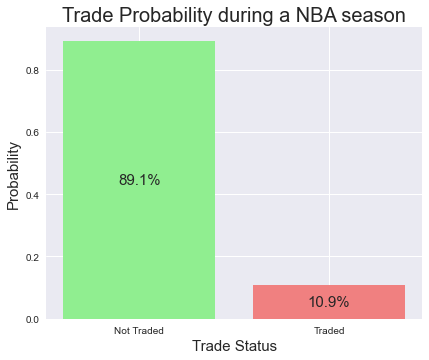

In [14]:
plt.style.use("seaborn")
def percentage(param):
  return param/df.shape[0]

not_traded = 1 - sum(list_unique)/df.shape[0]
trades = [percentage(i) for i in list_unique]

trade_prob = [not_traded, sum(trades)]

labels = ["Not Traded", "Traded"]
colors = ["lightgreen", "lightcoral"]
size = plt.figure(figsize=(6,5))
plt.bar(labels,trade_prob, color=colors)

# Add the percentages in the middle of each bar
for i, v in enumerate(trade_prob):
  plt.text(i, v/2, f"{v*100:.1f}%", ha="center", va="center", fontsize=15)

plt.title("Trade Probability during a NBA season", size=20)
plt.xlabel("Trade Status", size=15)
plt.ylabel("Probability", size=15)
plt.show()


<p style="font-family: 'Times New Roman', Times, serif;">
The likelihood of being traded in the NBA in a given season is 10.9%.
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
<h3 style="font-family: 'Times New Roman', Times, serif;">4. Positionless Basketball</h3>

<p style="font-family: 'Times New Roman', Times, serif;">
Moving away from the theme of trades, we can now look at the trend of positionless basketball in the modern NBA era. We can look at positions and their roles within a team to see if our theory about positionless basketball holds true. Let's first look at the positions that are used in the dataframe. 
</p>
</p>

In [15]:
pos_values = df["Pos"].value_counts()
pos_values

SG          4654
PF          4598
C           4513
SF          4397
PG          4254
G            107
F             96
G-F           55
SF-SG         43
F-C           42
C-PF          39
SG-PG         36
PF-C          35
F-G           34
SG-SF         34
PG-SG         33
PF-SF         32
SF-PF         27
C-F           19
SG-PF          4
SF-PG          1
C-SF           1
PG-SF          1
SF-C           1
SG-PG-SF       1
Name: Pos, dtype: int64

<p style="font-family: 'Times New Roman', Times, serif;">
We can tell that there are many position-archetypes, however most fall within the category of the five positions in basketball: point guard, shooting guard, small forward, power forward and center. Let’s assign all positions to one of these:

</p>

In [16]:
data_positions = df["Pos"]
pos_list = []

for values in data_positions:
    x = values.split("-")[0]
    if x in ["PG", "SG", "SF", "PF", "C"]:
      x = x
    elif x == "G":
      x = np.random.choice(["PG", "SG"])
    else:
       x = np.random.choice(["SF", "PF"])
    pos_list.append(x)
    
df["Pos"] = pos_list

<p style="font-family: 'Times New Roman', Times, serif;">
In our code we ignore values that fall within our position category. Position values that for instance have “PG-SG” will be assigned to the first position, so in this instance, it will be “PG”. If one of the positions does not fall into a position category which happens when the position value is either “G” or “F” it will be randomly assigned to either “PG” or “SG” for “G” and either “SF” or “PF” for “F”. Although this method is not perfect in terms of the predominant position, it is a good estimator. Additionally, the value counts for “G” and “F” are small enough not to have major implications on the overall analysis going forward. Our revised counts for the different positions are:
</p>

In [17]:
df["Pos"].value_counts()

SG    4798
PF    4750
C     4572
SF    4556
PG    4381
Name: Pos, dtype: int64

<p style="font-family: 'Times New Roman', Times, serif;">
To determine whether the positions in the league have become more fluid, we need to define the general roles of each position. Centers and power forwards are generally considered to be bigger positions and are responsible for taking rebounds. Point guards and shooting guards are generally smaller positions and are known for their ball handling and passing abilities. These general categories can help us understand how rebounds and assists should be distributed among the different positions in the league.
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
We can make a scatter plot sorted by positions to see how position roles where distrubuted. Let's make the function:
</p>

In [18]:
def create_plot(df, year: int):
  df_year = df.copy()
  df_year = df_year.loc[(df["Year"] == year) & (df["MP"] >= 25)]
  x = 10
  df_year["PTS_i"] = (df_year["PTS"] * x)

  fig, ax = plt.subplots()

  colors = {"PG":"#FF3C00","SG": "#FFB400", "SF": "#C8FF00", "PF": "#039949", "C": "#00FFA0"}

  grouped = df_year.groupby('Pos')
  for key, group in grouped:
    ax = group.plot(ax=ax, kind='scatter', x='AST', y='TRB', label=key, color=colors[key], alpha=.5, edgecolors="black", s="PTS_i")
    ax.set_title(f"{year-1} - {year} season")  

  for key, group in grouped:
    group_p = group.sort_values("PTS_i", ascending=False)
    group_a = group.sort_values("AST", ascending=False)
    group_r = group.sort_values("TRB", ascending=False)
    largest_points = group_p.head(3).merge(group_a.head(5))
    largest_points = largest_points.merge(group_r.head(5))
    for index, row in largest_points.iterrows():
      ax.annotate(row["Player"], (row["AST"], row["TRB"]))

  #Fixing order of legend  
  legend, labels = plt.gca().get_legend_handles_labels()
  order = [2,4,3,1,0]
  plt.legend([legend[idx] for idx in order],[labels[idx] for idx in order]) 

  return ax

<p style="font-family: 'Times New Roman', Times, serif;">
The code above focuses on the top players in the league by taking into account their position, rebound average and assist average. To ensure that the scatterplot only includes players who have a significant impact on the game, the code only includes players who average at least 25 minutes per game. This allows the scatterplot to focus on the "heavy hitters" of the league. The size parameter of points is added to emphasize these key players even more.
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
Let's see how the NBA looked in regards to positions in the 1970-1971 season:
</p>

<AxesSubplot:title={'center':'1970 - 1971 season'}, xlabel='AST', ylabel='TRB'>

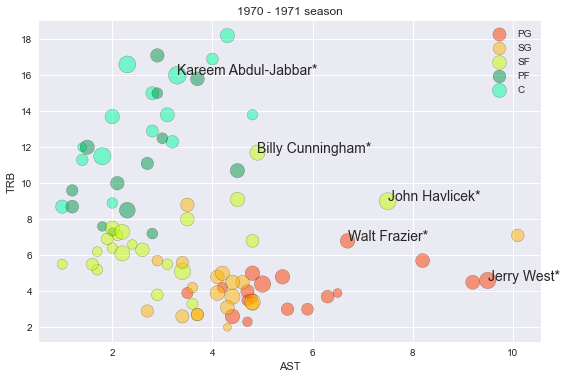

In [19]:
create_plot(df, 1971)

<p style="font-family: 'Times New Roman', Times, serif;">
In 1970, the larger positions tended to average more rebounds, while the smaller positions tended to average more assists. This suggests that the roles within teams were well-defined. By comparing the data from different years, we can see if there have been any changes in the distribution of rebounds and assists by position.
</p>

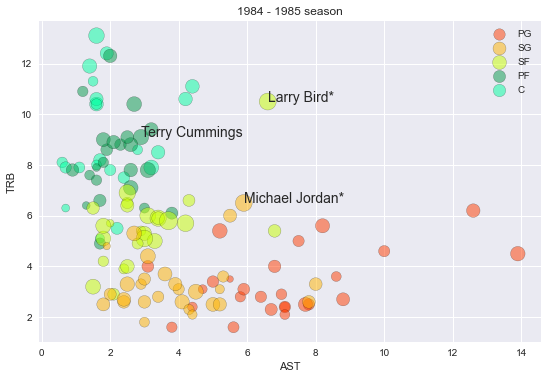

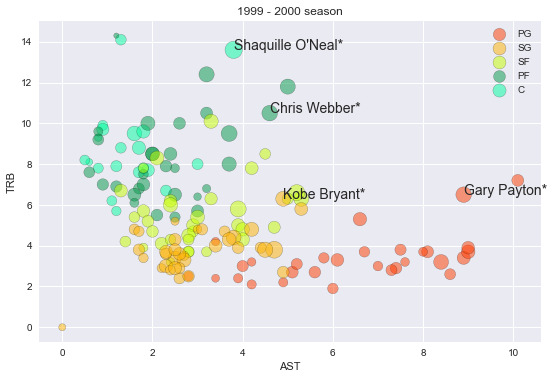

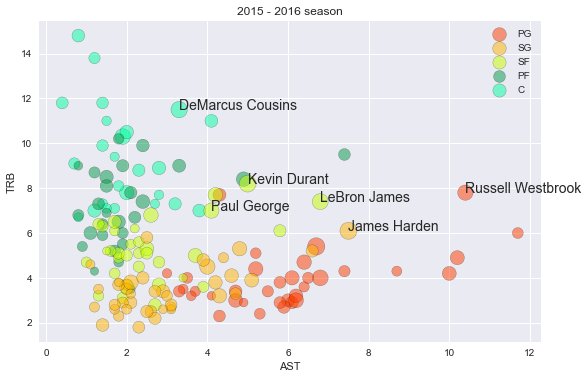

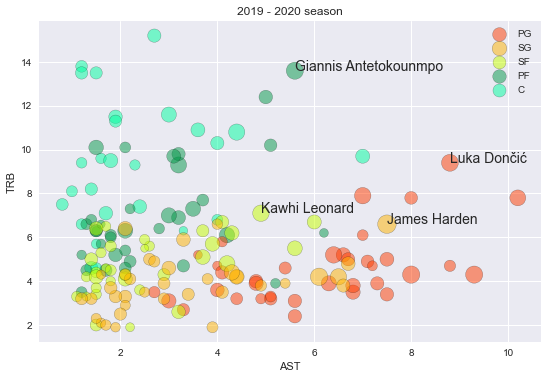

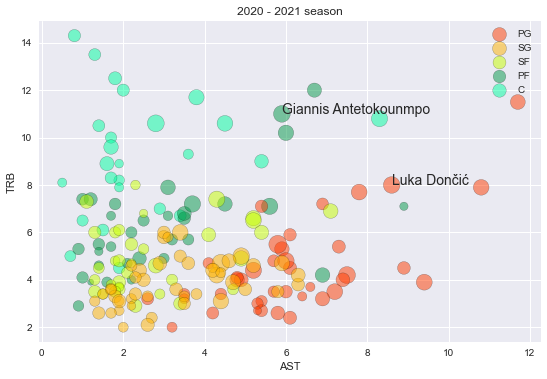

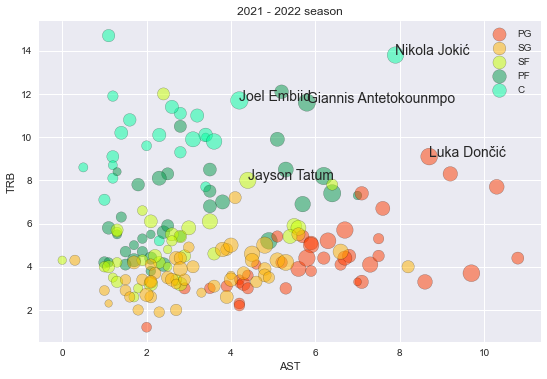

In [62]:
years = [1985, 2000, 2016, 2020, 2021, 2022]
for i in years:
    create_plot(df, i)
    
display(HTML("<style>div.output_scroll { height: 170em; }</style>"))

<p style="font-family: 'Times New Roman', Times, serif;">
The changes towards a more positionless style of basketball seem to have happened recently. In the 2015-2016 season, there is no clear indication of a shift in the way the game is played. However, in the 2019-2020 season, some changes can be seen. In the 2020-2021 and 2021-2022 seasons, these changes are even more pronounced, with the larger positions moving towards the right and the smaller positions moving up the chart. This suggests that we have moved towards a more positionless system, and the top players have acquired a more diverse set of skills - the traditional archetypes of basketball have become less distinct.


<h4 style="font-family: 'Times New Roman', Times, serif;"><b>Analyzing the evolution of positions based on conditions</b></h4>
<p style="font-family: 'Times New Roman', Times, serif;">
Despite examining the traditional roles of different positions over the years, our scatterplots do not clearly show the changes in scoring by position. We can use conditional statistics to analyze how the scoring load for each position has changed in recent years. Similarly, we can analyze changes in three-point shooting percentage by position since the introduction of the three-point line to see if skill levels have changed among three-point shooters based on their position.
</p>

In [21]:
df_bayes = df.loc[(df["MP"] >= 25)]

temp = pd.DataFrame()
temp["3P%_mean"] = df_bayes.groupby("Year").mean()["3P%"]
temp["PTS_mean"] = df_bayes.groupby("Year").mean()["PTS"]
temp = temp.reset_index()
df_bayes = df_bayes.merge(temp, on = "Year")
df_bayes["Above_PTS_mean"] = df_bayes["PTS"] > df_bayes["PTS_mean"]
df_bayes["Above_3P%_mean"] = df_bayes["3P%"] > df_bayes["3P%_mean"]
df_bayes

,Rk,Player,Pos,Age,Tm,G,GS,MP,FGA,FG%,3PA,3P%,FTA,FT%,TRB,AST,PTS,Year,3P%_mean,PTS_mean,Above_PTS_mean,Above_3P%_mean
0,1,Paul Arizin*,SF,23,PHW,66,NaN,44.5,18.5,0.448,NaN,NaN,10.7,0.818,11.3,2.6,25.4,1952,NaN,11.865455,True,False
1,3,Don Barksdale*,PF,28,BLB,62,NaN,32.5,13.0,0.338,NaN,NaN,5.5,0.691,9.7,2.2,12.6,1952,NaN,11.865455,True,False
2,4,Leo Barnhorst,SF,27,INO,66,NaN,35.5,13.6,0.389,NaN,NaN,2.8,0.652,6.5,3.9,12.4,1952,NaN,11.865455,True,False
3,8,Vince Boryla,SF,24,NYK,42,NaN,34.3,12.4,0.387,NaN,NaN,2.7,0.835,5.2,2.1,11.9,1952,NaN,11.865455,True,False
4,9,Don Boven,SG,26,MLH,66,NaN,30.0,10.1,0.299,NaN,NaN,5.3,0.731,5.1,2.7,9.9,1952,NaN,11.865455,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8354,582,Andrew Wiggins,SF,26,GSW,73,73.0,31.9,14.0,0.466,5.5,0.393,3.2,0.634,4.5,2.2,17.2,2022,0.342246,15.725556,True,True
8355,584,Brandon Williams,PG,22,POR,24,16.0,26.7,11.8,0.372,4.4,0.292,4.0,0.701,3.1,3.9,12.9,2022,0.342246,15.725556,False,False
8356,589,Robert Williams,C,24,BOS,61,61.0,29.6,6.0,0.736,0.0,0.000,1.5,0.722,9.6,2.0,10.0,2022,0.342246,15.725556,False,False
8357,595,Christian Wood,C,26,HOU,68,67.0,30.8,12.9,0.501,4.9,0.390,4.9,0.623,10.1,2.3,17.9,2022,0.342246,15.725556,True,True


<p style="font-family: 'Times New Roman', Times, serif;">
In the code above, we are checking if a player has more than the average number of points per game, and if they have a higher than average three-point percentage. This creates two new columns in our dataframe that indicate whether a player is above or below the league average for each of those statistical categories.
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
Creating some functions to make new dataset based on the new averages:
</p>

In [22]:
def pos_stats(year, stat): 
  positions = ["PG", "SG", "SF", "PF", "C"]
  stats = []
  year = df_bayes[df_bayes["Year"] == year]
  for pos in positions:
    stats.append(year.groupby("Pos").mean()[f"Above_{stat}_mean"][pos])
  return pd.DataFrame(stats)

In [23]:
def renaming(x):
  x.rename(columns={"index": "Year", 0: "PG", 1: "SG", 2: "SF", 3: "PF", 4:"C"}, inplace=True)

df_points = pd.DataFrame()
for year in range (1952, 2023): #1952 because of error before this - does not have implications on what we want to show
  if year >= 1952:
    df_points[year] = pos_stats(year, "PTS")
df_points = df_points.T #Transposing
df_points.reset_index(inplace=True)
renaming(df_points)
  
df_3P = pd.DataFrame()
for year in range (1980, 2023):
  if year >= 1980:
    df_3P[year] = pos_stats(year, "3P%")
df_3P = df_3P.T #Transposing
df_3P.reset_index(inplace=True)
renaming(df_3P)

<p style="font-family: 'Times New Roman', Times, serif;">
Running the code above gives us the following two dataframes:
</p>

In [24]:
df_points.head()

,Year,PG,SG,SF,PF,C
0,1952,0.272727,0.416667,0.454545,0.333333,0.777778
1,1953,0.363636,0.500000,0.166667,0.500000,0.636364
2,1954,0.300000,0.500000,0.222222,0.200000,0.875000
3,1955,0.222222,0.375000,0.444444,0.500000,0.714286
4,1956,0.250000,0.222222,0.666667,0.375000,0.666667


In [25]:
df_3P.head()

,Year,PG,SG,SF,PF,C
0,1980,0.631579,0.800000,0.500000,0.400000,0.160000
1,1981,0.520000,0.642857,0.370370,0.272727,0.200000
2,1982,0.739130,0.523810,0.500000,0.208333,0.304348
3,1983,0.652174,0.826087,0.592593,0.434783,0.125000
4,1984,0.714286,0.739130,0.520000,0.238095,0.320000


<p style="font-family: 'Times New Roman', Times, serif;">
These dataframes can be used to plot the changes in position-based scoring over time:
</p>

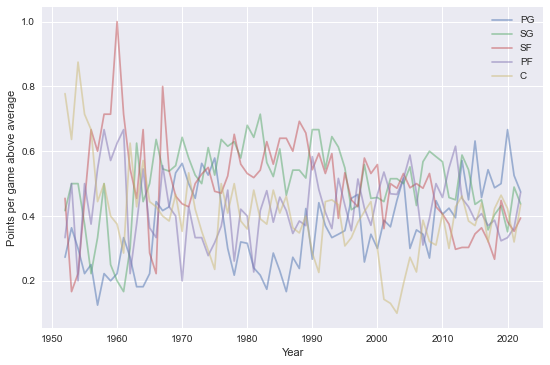

In [26]:
Pos = ["PG", "SG", "SF", "PF", "C"]
for i, pos in enumerate(Pos):
  plt.plot(df_points["Year"], df_points[pos], label= pos, alpha=.5)
  plt.xlabel('Year')
  plt.ylabel('Points per game above average')
  plt.legend()

<p style="font-family: 'Times New Roman', Times, serif;">
Here, we can see that there has been a lot of variation in which positions are responsible for the most scoring. However, one thing is clear: the gap has narrowed and today, any position has approximately the same likelihood of being above the league average in points.
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
Let’s do the same analysis for three-point percentage:
</p>

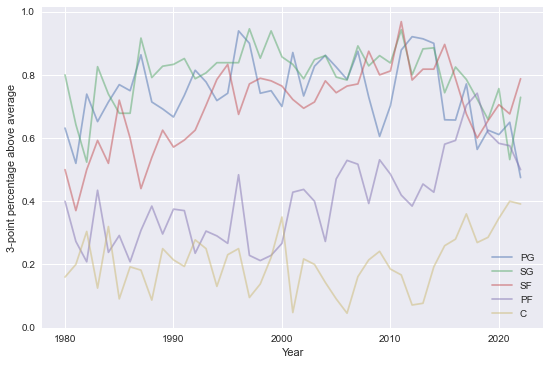

In [27]:
for i, pos in enumerate(Pos):
  plt.plot(df_3P["Year"], df_3P[pos], label= pos, alpha=.5)
  plt.xlabel('Year')
  plt.ylabel('3-point percentage above average')
  plt.legend()

<p style="font-family: 'Times New Roman', Times, serif;">
We can see that the same trend as above is evident, altough not quite as much, with the lines moving closer together. However, one interesting observation is the decline of guards shooting above the league average. This raises the issue of not considering the context of the shots being taken. It's possible that guards take more difficult shots and are more heavily guarded by defenses, given that guards are generally better three-point shooters. However, this is only a theory and the main takeaway from the plot is simply to show how the positions have converged in recent years.
<p>


<h3 style="font-family: 'Times New Roman', Times, serif;">5. Shooting trends in the last decades</h3>
<p style="font-family: 'Times New Roman', Times, serif;">
One interesting aspect of looking at the evolution of shooting in basketball over time is to see how it has changed in recent decades. This include exploring the frequency of three-point shots, and comparing it to previous eras to see if they are more common now. Overall, by examining the evolution of shooting in basketball, we can gain valuable insights into the history and development of the sport.
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
We can add true shooting to our dataframe:
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
True shooting percentage is a measure of a player's efficiency at shooting the ball. It takes into account the value of three-point shots and free throws, as well as field goals. The formula for true shooting percentage is as follows:
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
True shooting percentage = Total points / (2 * (Field goal attempts + 0.44 * Free throw attempts))
</p>
<p style="font-family: 'Times New Roman', Times, serif;">
By adding this metric to the dataframe, we can better understand a player's shooting ability and efficiency.
</p>


In [28]:
df["TS%"] = df["PTS"] / (2*(df["FGA"]+(0.44*df["FTA"])))

<p style="font-family: 'Times New Roman', Times, serif;">
We continue the theme of not diluting stats with more insignificant players and therefore filter out players with less than 50 games in a given season
</p>

In [29]:
#Following the theme of looking at the changes in the NBA
game_filt = df["G"] > 50
shooting_df = df.loc[game_filt].copy()
shooting_df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FGA,FG%,3PA,3P%,FTA,FT%,TRB,AST,PTS,Year,TS%
0,1,Curly Armstrong,SG,31,FTW,63,NaN,NaN,8.2,0.279,NaN,NaN,3.8,0.705,NaN,2.8,7.3,1950,0.369733
2,3,Leo Barnhorst,SF,25,CHS,67,NaN,NaN,7.4,0.349,NaN,NaN,1.9,0.698,NaN,2.1,6.5,1950,0.394609
6,5,Ralph Beard,SG,22,INO,60,NaN,NaN,15.6,0.363,NaN,NaN,4.7,0.762,NaN,3.9,14.9,1950,0.421666
8,7,Charlie Black,PF,28,TOT,65,NaN,NaN,12.5,0.278,NaN,NaN,4.9,0.651,NaN,2.5,10.2,1950,0.347980
11,8,Nelson Bobb,PG,25,PHW,57,NaN,NaN,4.4,0.323,NaN,NaN,2.3,0.626,NaN,0.8,4.2,1950,0.388027


<p style="font-family: 'Times New Roman', Times, serif;">
One way to analyze a player's performance is by examining their field goal percentage. This metric is calculated by dividing the number of shots made by the number of shots taken. It is often included in box scores as a way to assess a team's or player's offensive output. By creating a graph that shows how field goal percentage has changed over time, we can gain a better understanding of how shooting has evolved in basketball.
</p>

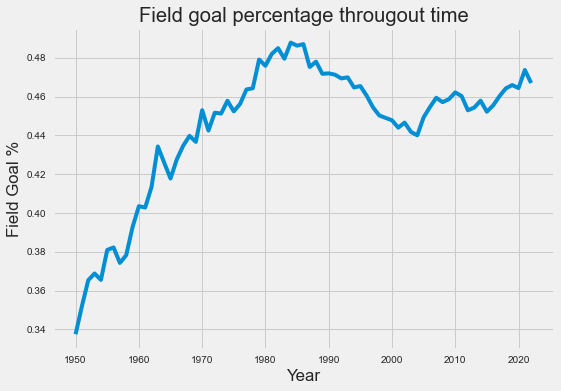

In [30]:
plt.style.use("fivethirtyeight")
year = shooting_df.groupby(["Year"])
y = pd.DataFrame(year["FG%"].mean())
y.reset_index(level=0, inplace=True)
plt.plot(y["Year"], y["FG%"])
plt.title("Field goal percentage througout time")
plt.xlabel('Year')
plt.ylabel('Field Goal %')
plt.show()

<p style="font-family: 'Times New Roman', Times, serif;">
<p style="font-family: 'Times New Roman', Times, serif;">
Based on the data shown in our first graph, it appears that overall shooting ability in basketball may have declined since the 1980s. However, it is important to note that field goal percentage alone does not provide the full context of a player's shooting performance. For example, a shot taken close to the basket is generally considered easier to make than a shot from a longer distance. To provide a more complete picture of a player's shooting ability, it is important to consider the context of each shot.
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
One significant development in the history of basketball that has had a major impact on field goal percentage is the introduction of the 3-point line. In 1961, the NBA added a 3-point line, which allows players to earn three points for shots made from beyond this line, as opposed to the two points awarded for shots made inside it. The implementation of the 3-point line has led to a shift in strategies, with many players now focusing on taking more 3-point shots. In recent years, the 3-point shot has become increasingly popular, thanks in part to the rise of more advanced statistical analysis of the game.
</p>
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
Let's add 3-point shots to the plot by scaling each variable to make it comparable:

In [31]:
def shot_scale_plot(variable, alpha):
  shooting_df[f"{variable}_s"] = (shooting_df[variable] - shooting_df[variable].mean()) / shooting_df[variable].std() 
  year = shooting_df.groupby(["Year"])
  x = pd.DataFrame(year[f"{variable}_s"].mean())
  x.reset_index(level=0, inplace=True)
  plt.plot(x["Year"], x[f"{variable}_s"], label=variable, alpha=alpha)  

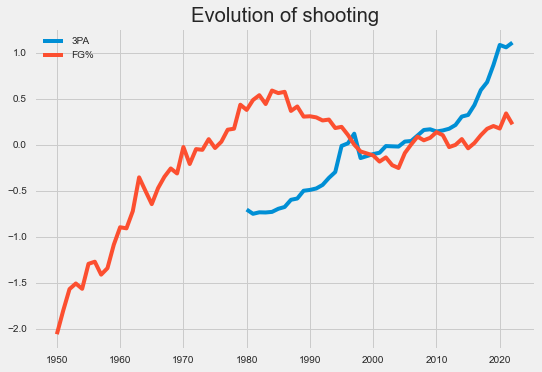

In [32]:
shot_scale_plot("3PA", 1)
shot_scale_plot("FG%", 1)
plt.title("Evolution of shooting")
plt.legend()
plt.show()

<p style="font-family: 'Times New Roman', Times, serif;">
In order to better understand the relationship between field goal percentage and other shooting metrics over time, we can use scaled models to analyze how these metrics have deviated from the mean. By adding data on 3-pointers attempted, we can see that when the number of 3-pointers attempted goes up, field goal percentage tends to go down, at least from the 1980s to the early 2000s.
</p>
<br>
<p style="font-family: 'Times New Roman', Times, serif;">
To provide a more comprehensive view of shooting performance, we can also include additional metrics such as true shooting percentage (TS%) and 3-point percentage (3P%). By incorporating these metrics into our analysis, we can gain a more nuanced understanding of the relationship between different aspects of shooting performance.
</p>

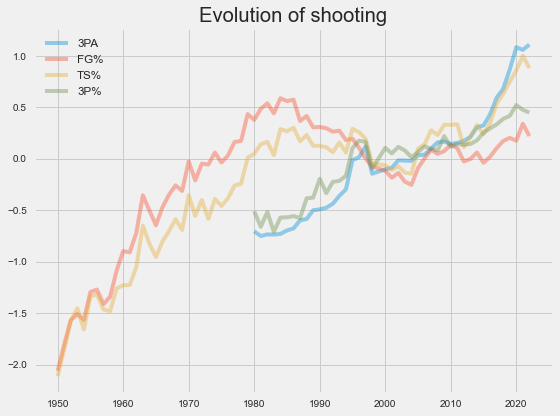

In [33]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8,6))
shot_scale_plot("3PA", .4)
shot_scale_plot("FG%", .4)
shot_scale_plot("TS%", .4)
shot_scale_plot("3P%", .4)
plt.title("Evolution of shooting")
plt.legend(loc="best", fontsize="small")
plt.tight_layout()
plt.show()

<p style="font-family: 'Times New Roman', Times, serif;">
When analyzing data with multiple variables, it can be challenging to understand the relationship between them. A correlation matrix is a tool that can be used to visualize the relationship between different variables. By creating a correlation matrix, we can quickly see how different variables are correlated with one another and identify potential trends or patterns in the data. This can help us gain a better understanding of the data and make more informed conclusions.
</p>

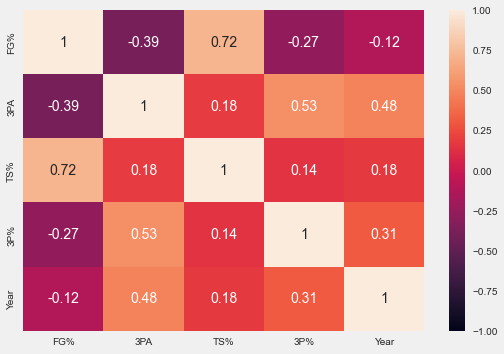

In [34]:
#Only looking at data from 1980
filt_1980 = (shooting_df["Year"] >= 1980)
stats_1980 = shooting_df.loc[filt_1980].reset_index()

shooting_df_1980 = stats_1980[["FG%", "3PA", "TS%", "3P%", "Year"]]
Years = shooting_df_1980.groupby("Year").mean()
sns.heatmap(shooting_df_1980.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

<p style="font-family: 'Times New Roman', Times, serif;">
The correlation matrix allows us to see the relationship between different variables in the data. From the matrix, we can see that there is a positive relationship between the number of 3-pointers attempted and both the number of years and 3-point percentage. This suggests that as players have become more skilled 3-point shooters over the years they tend to take more shots. There is also a negative relationship between field goal percentage and 3-pointers attempted. This means that as the number of 3-pointers attempted increases, field goal percentage tends to decrease. In contrast, true shooting percentage shows little correlation with years, indicating that it may be a more robust measure of shooting ability that is not as influenced by the changing trends in the game. Overall, the correlation matrix provides valuable insights into the relationship between different shooting metrics and can help us better understand the evolution of shooting in basketball.
</p>

<h3 style="font-family: 'Times New Roman', Times, serif;">6. A closer look at true shooting</h3>

<p style="font-family: 'Times New Roman', Times, serif;">
In this segment, we will take a deep dive into true shooting. True shooting is a statistic that measures a player's shooting efficiency by accounting for the value of three-point shots and free throws. It is an important metric for evaluating the effectiveness of a player's shooting and is widely used in the analysis of basketball statistics. In the following analysis, we will examine true shooting as a metric and compare it to field goal percentage and take a look at who is the greatest true shooter of all time.
</p>
<p style="font-family: 'Times New Roman', Times, serif;">
Let's start of by looking at some distrubution graphs:
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
Defining the function for the graph:
</p>

In [35]:
def histo_plot(variable_name):
  plt.style.use("seaborn")
  mean = stats_1980[variable_name].mean()
  SD = stats_1980[variable_name].std()
  m = stats_1980.shape[0]
  series = stats_1980[variable_name]
  a3_SD = round(mean + SD * 3, 2)

  sim = np.random.normal(mean, SD, m)

  fig, ax = plt.subplots(2)
  pd.Series(sim).hist(bins=100, alpha=0.7, label="Sim - NormalDist", ax=ax[0])
  series.hist(bins=100, alpha=0.7, label=f"Actual {variable_name}", ax=ax[0])
  ax[0].axvline(a3_SD, color="red", label = f"{a3_SD} (3σ)", linestyle="--", alpha=0.4, ymax=100)

  over_3SD_filt = series > a3_SD
  over_3SD = series.loc[over_3SD_filt]

  norm_over_3SD_filt = sim > a3_SD
  norm_over_3SD = pd.Series(sim).loc[norm_over_3SD_filt]

  a = pd.Series(np.zeros(len(over_3SD) - len(norm_over_3SD)))
  norm_over_3SD = pd.concat([norm_over_3SD, a], ignore_index=True)

  bins = len(norm_over_3SD) 

  norm_over_3SD.hist(ax=ax[1], bins=bins, alpha=0.7, label=f"Over {a3_SD} NormDist", range=[a3_SD,over_3SD.max()])
  over_3SD.hist(ax=ax[1], bins=bins, alpha=0.5, label=f"Over {a3_SD} Actual", range=[a3_SD,over_3SD.max()])

  ax[1].axvline(a3_SD, color="red", label = f"{a3_SD} (3σ)", linestyle="--", alpha=0.4)
  ax[0].legend(fontsize="x-small")
  ax[1].legend(fontsize="x-small")
  ax[0].set_title(variable_name)
  plt.show()

<p style="font-family: 'Times New Roman', Times, serif;">
Let's plot the graphs:
</p>

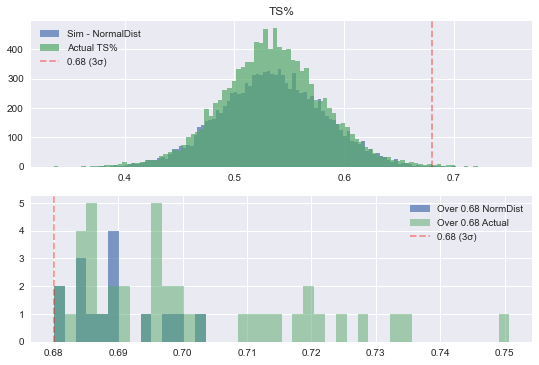

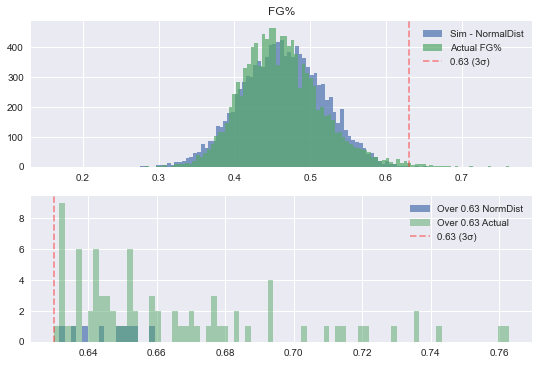

In [36]:
norm_test_list = ["TS%", "FG%"]
for i in norm_test_list:
  histo_plot(i)

<p style="font-family: 'Times New Roman', Times, serif;">
One interesting finding from the analysis of shooting metrics in basketball from this plot is the difference in the distribution of true shooting percentage and field goal percentage. While true shooting percentage appears to be relatively normally distributed, with most values falling near the mean, field goal percentage appears to have much longer tails, with a greater number of extreme values. This suggests that true shooting percentage may be a more reliable measure of shooting ability, as it is less influenced by extreme values. In contrast, field goal percentage may be more susceptible to fluctuations and outliers, making it less reliable as a measure of shooting ability. Overall, these findings highlight the importance of considering the distribution of different metrics when analyzing basketball shooting data relative to their era.
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
Given that true shooting percentage is approximately normally distributed, we can create distributions for the mean and standard deviation of this metric over the past decades. 
</p>

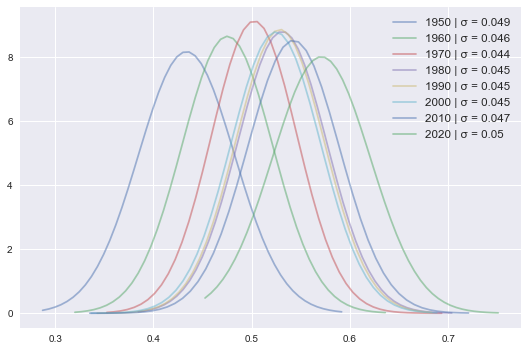

In [37]:
# plt.style.use("fivethirtyeight")
for i in range (1950, 2021, 10):
  a = shooting_df.loc[(shooting_df["Year"] >= i) & (shooting_df["Year"] < i + 10)]
  b = a["TS%"] 
  b_mean = b.mean()
  b_SD = b.std()
  domain = np.linspace(np.min(b), np.max(b))
  plt.plot(domain, norm.pdf(domain, b_mean, b_SD), label=f"{i} | σ = {round(b_SD,3)}", alpha=.5)
  plt.legend(fontsize="small")

<p style="font-family: 'Times New Roman', Times, serif;">
The fact that true shooting percentage has a relatively normal distribution is strong evidence that it is influenced by league norms and standards. This means that in order to accurately compare players, we need to take into account the era in which they played and adjust their true shooting percentage accordingly. One way to do this is by using the standard deviation of true shooting percentage for each year and adjusting players' true shooting percentages for inflation. This allows us to compare players across different eras and better understand how their shooting abilities compare relative to their peers. By using this approach, we can gain a more accurate picture of a player's shooting ability relative to their era.
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
With this information, we can adjust each player's true shooting ability to their respective year's average and determine who is the greatest "inflation-adjusted true shooter.":
</p>

In [38]:
a = pd.DataFrame()
a["TS%_Mean"] = shooting_df.groupby("Year")["TS%"].mean()
a["TS%_SD"] =  shooting_df.groupby("Year")["TS%"].std()
a = a.reset_index()

In [39]:
shooting_df = shooting_df.merge(a, on = "Year")
shooting_df["TS%_s_ia"] = (shooting_df["TS%"] - shooting_df["TS%_Mean"]) / shooting_df["TS%_SD"]

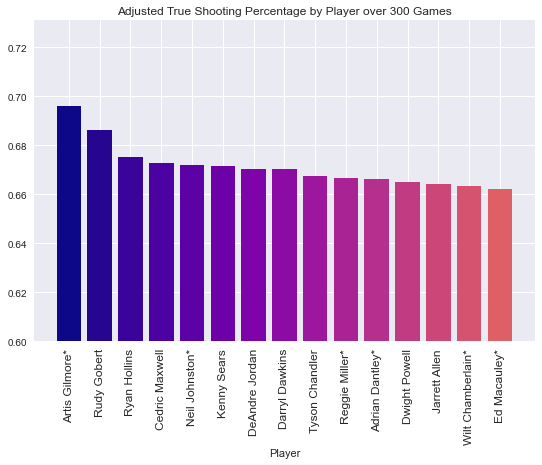

In [40]:
TS_mean_2022 = shooting_df.loc[shooting_df["Year"] == 2022]["TS%"].mean()
TS_td_2022 = shooting_df.loc[shooting_df["Year"] == 2022]["TS%"].std()
shooting_df["i_adj_TS"] = TS_mean_2022 + TS_td_2022 * shooting_df["TS%_s_ia"]

player_TS = shooting_df.groupby("Player").sum()["G"] > 300
adjusted_TS_300 = shooting_df.groupby("Player").mean()["i_adj_TS"]
adjusted_TS_300 = adjusted_TS_300.loc[player_TS]

adjusted_TS_300 = pd.DataFrame(adjusted_TS_300)
adjusted_TS_300.reset_index(inplace=True)
adjusted_TS_300.sort_values(by="i_adj_TS", ascending=False, inplace=True)
top_10_TS_300 = adjusted_TS_300.head(15)
fig, ax = plt.subplots()

players = top_10_TS_300["Player"]
values = top_10_TS_300["i_adj_TS"]

viridis = cm.get_cmap("plasma", 25)
colors = viridis(range(top_10_TS_300.shape[0]))

ax.bar(players, values, color=colors)
ax.set_ylim([.6,None])
plt.xticks(rotation=90, size=12)

ax.set_title("Adjusted True Shooting Percentage by Player over 300 Games")
ax.set_xlabel("Player")

plt.show()

<p style="font-family: 'Times New Roman', Times, serif;">
In the code above, we have taken each player's standard deviation from their respective year and adjusted it to the mean and standard deviation of the 2021-2022 season. This allows us to compare the true shooting ability of players across different years, taking into account any changes in the average ability level of players over time.
</p>
<p style="font-family: 'Times New Roman', Times, serif;">
The plot is a bit surprising, as most of the players at the top of the chart are big men with relatively poor shooting ability. This can be interpreted as evidence that these players take high-quality shots and are therefore efficient. Although true shooting accounts for 3-pointers, it still heavily favors high-quality, close-to-the-basket shots from big men. One player who stands out in the chart is Reggie Miller, a great shooter who has managed to outperform many of the bigger guys. This suggests that he must have had a particularly strong year from beyond the arc and in general shooting ability that year.
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
In conclusion, while true shooting is a useful metric for evaluating a player's shooting ability, it is not a perfect measure. One potential limitation of true shooting is that it can favor big men over great shooters. As a result, players who are good at taking high-quality shots from closer to the basket can appear to be more efficient shooters than they actually are, while players who are skilled at shooting from further away may be undervalued by the metric. This can make it difficult to accurately compare the shooting abilities of players who have different styles of play.
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
<b>Real true shooting:</b>
</p>
<p style="font-family: 'Times New Roman', Times, serif;">
True shooting percentage is a metric used to evaluate a basketball player's shooting efficiency by converting free throw attempts into a shot attempt equivalent. Intuitively, one might expect the coefficient used for this conversion to be 0.5, since players usually take two free throws at a time. However, this is not the case, as the coefficient used in the NBA is 0.44. The reason for this is that the coefficient must account for and-1s, technical free throws, flagrant foul free throws, and 3-point free throws, which can all affect a player's shooting efficiency. We can test the accuracy of this 0.44 coefficient by accessing the real data from the 2021-2022 season:
</p>

In [41]:
year = 2022
url = f"https://www.basketball-reference.com/leagues/NBA_{year}_advanced.html"
html = pd.read_html(url, header = 0)
df_2022= html[0]
dupes = df_2022.duplicated(subset=["Player"])
df_2022 = df_2022.loc[~dupes]
df_2022 = df_2022[["Player", "TS%"]]
df_2022 = df_2022.drop(df_2022[df_2022["Player"] == "Player"].index)
df_2022["TS%"] = df_2022["TS%"].astype(float)
df_2022 = df_2022.rename(columns={"TS%": "rTS%"})
df_2022

,Player,rTS%
0,Precious Achiuwa,0.503
1,Steven Adams,0.560
2,Bam Adebayo,0.608
3,Santi Aldama,0.452
4,LaMarcus Aldridge,0.604
...,...,...
835,Thaddeus Young,0.548
838,Trae Young,0.603
839,Omer Yurtseven,0.546
840,Cody Zeller,0.627


<p style="font-family: 'Times New Roman', Times, serif;">
To evaluate the accuracy of the 0.44 coefficient in estimating a player's true shooting percentage, a delta variable can be calculated as the difference between a player's real true shooting percentage and their estimated true shooting percentage using the 0.44 coefficient. This allows us to assess the extent to which the coefficient accurately captures a player's shooting efficiency and identify any potential limitations of the metric. Let's create this variable:
</p>

In [42]:
df_2022_TS = df[df["Year"] == 2022]
df_2022_TS = df_2022_TS[["Player", "TS%"]] 
a = pd.DataFrame(df_2022["rTS%"])
df_2022_TS.insert(1, "rTS%", a)
df_2022_TS.reset_index(inplace=True)

df_2022_TS.drop(columns=["index"], inplace=True)
df_2022_TS = df_2022_TS.round({"TS%" : 3})
df_2022_TS["Delta"] = df_2022_TS["rTS%"] - df_2022_TS["TS%"] 
df_2022_TS.dropna(inplace=True)
df_2022_TS.sort_values(by="rTS%", ascending=True, inplace=True)

<p style="font-family: 'Times New Roman', Times, serif;">
Plotting the model:
</p>

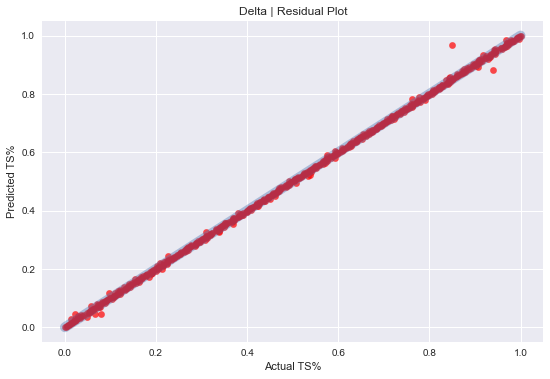

There is a 0.9985 correlation between estimated- and real true shooting


In [43]:
a = np.linspace(0,1,df_2022_TS.shape[0])
b = a + df_2022_TS["Delta"]

fig, ax = plt.subplots()
ax.plot(np.linspace(0,1,df_2022_TS.shape[0]), np.linspace(0,1,df_2022_TS.shape[0]), linewidth=10, alpha=.4)
ax.scatter(b, np.linspace(0,1,df_2022_TS.shape[0]), s=40, color="red", alpha=.7)
plt.title('Delta | Residual Plot')
plt.xlabel('Actual TS%')
plt.ylabel('Predicted TS%')
plt.show()

#Corr
corr = df_2022_TS["TS%"].corr(df_2022_TS["rTS%"])
print(f"There is a {(round(corr, 4))} correlation between estimated- and real true shooting")

In [44]:
#95% confidence
upper = df_2022_TS["Delta"].mean() + 1.96 * df_2022_TS["Delta"].std()
under = df_2022_TS["Delta"].mean() - 1.96 * df_2022_TS["Delta"].std()
interval = [under, upper]
interval

[-0.014338118425061516, 0.013842306029751632]

<p style="font-family: 'Times New Roman', Times, serif;">
Here we see true shooting and real true shooting statistics show a strong relationship, as indicated by the small 95% confidence interval for the delta between the two variables and a strong correlation of 0.9985.
<p>
<p style="font-family: 'Times New Roman', Times, serif;">
While it may seem intuitive to simply use a player's real true shooting percentage to evaluate their shooting efficiency, there are a few reasons why this is not always practical. One of the reasons that real true shooting percentage may not be as commonly used as other metrics is that it requires detailed data on a variety of different types of shots, such as and-1 free throws, flagrant foul attempts, and 3-point foul shots goals made. This data may not always be readily available, making it difficult to accurately calculate a player's true shooting percentage. In such cases, using the 0.44 coefficient to estimate a player's true shooting percentage can provide a useful approximation of their shooting efficiency without the need for extensive data. Additionally, using the coefficient allows for a simpler and more straightforward calculation of true shooting percentage, making it easier to apply the metric in a variety of situations.
<p>

<h3  style="font-family: 'Times New Roman', Times, serif;"> 7. Regular season points and the Hall Of Fame </h3>

<p style="font-family: 'Times New Roman', Times, serif;">
The attentive reader might have noticed an asterisk ("*") at the end of some player names. This asterisk indicates that the player is a member of the Hall of Fame, an honor awarded to the greatest players in professional basketball. Let's test if a players regular season points average, might be considered in determining their eligibility for the Hall of Fame.
</p>

In [45]:
df_HOF = df[df["Year"] <= 1995]
df_HOF = df_HOF[df["PTS"].notna()]
df_HOF = df_HOF[df_HOF["TS%"].notna()]
df_HOF = df_HOF.groupby("Player").mean()
df_HOF.reset_index(inplace=True)

/var/folders/_m/gqjb1cj53tngfs813t585msh0000gn/T/ipykernel_38077/3112515444.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_HOF = df_HOF[df["PTS"].notna()]


In [46]:
# Create Hall of Fame column and set to False
df_HOF["Hall_of_Fame"] = False

# Loop through Player column
for name in df_HOF['Player']:
  # Check if name ends with an "*"
  if name[-1] == "*":
    # Find the index of the pblayer
    player_name = df_HOF[df_HOF["Player"] == name].index[0]
    # Set Hall of Fame to True
    df_HOF.loc[player_name, 'Hall_of_Fame'] = True
    
# Check if it worked
print(df_HOF['Hall_of_Fame'])

0       False
1       False
2       False
3       False
4       False
        ...  
2370    False
2371     True
2372     True
2373    False
2374    False
Name: Hall_of_Fame, Length: 2375, dtype: bool


<p style="font-family: 'Times New Roman', Times, serif;">
 In the code above, the value 0 is assigned to players who do not have an asterisk, while the value 1 is assigned to players who do have an asterisk. The players are also excluded if their careers occurred after the 1994-1995 season. This cut-off is made because some players who had Hall of Fame worthy careers after this season may not yet have been inducted into the Hall of Fame yet. The choice of cut-off point can be discussed, but for this specific analysis, the 1995 season was chosen as the threshold.
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
Another potential criticism of the analysis is that it considers season averages across all seasons, which could give an advantage to players with long, successful careers over those with shorter spurts of greatness.
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
Let's see how our new dataframe looks, with just player, points and Hall of Fame as the variables:
</p>

In [47]:
df_HOF = df_HOF[["Player", "PTS", "Hall_of_Fame"]]
df_HOF

,Player,PTS,Hall_of_Fame
0,A.C. Green,11.620000,False
1,A.J. English,9.850000,False
2,A.J. Wynder,2.000000,False
3,A.W. Holt,0.700000,False
4,Aaron James,10.760000,False
...,...,...,...
2370,Zeke Zawoluk,6.433333,False
2371,Zelmo Beaty*,15.850000,True
2372,Šarūnas Marčiulionis*,13.720000,True
2373,Žan Tabak,2.000000,False


<p style="font-family: 'Times New Roman', Times, serif;">
Creating a glm table:
</p>

In [48]:
mod = smf.glm(formula="Hall_of_Fame~ PTS", data=df_HOF, family=sm.families.Binomial()).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               Generalized Linear Model Regression Results                               
=========================================================================================================
Dep. Variable:     ['Hall_of_Fame[False]', 'Hall_of_Fame[True]']   No. Observations:                 2375
Model:                                                       GLM   Df Residuals:                     2373
Model Family:                                           Binomial   Df Model:                            1
Link Function:                                             Logit   Scale:                          1.0000
Method:                                                     IRLS   Log-Likelihood:                -322.27
Date:                                           Tue, 20 Dec 2022   Deviance:                       644.55
Time:                                                   22:31:22   Pearson chi2:                 2.20e+03
No. Iterations:                                                7   Pseudo R-squ. (CS):             0.1792
Covariance Type:                                       nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4308      0.310     20.743      0.000       5.823       7.038
PTS           -0.3570      0.022    -16.355      0.000      -0.400      -0.314
==============================================================================
"""

<p style="font-family: 'Times New Roman', Times, serif;">
The analysis shows that there is a significant relationship between being inducted into the Hall of Fame and the average points a player scored over their seasons in the NBA. To better understand the rest of the data, it would be helpful to visualize it and make an assessment from that:
<p>

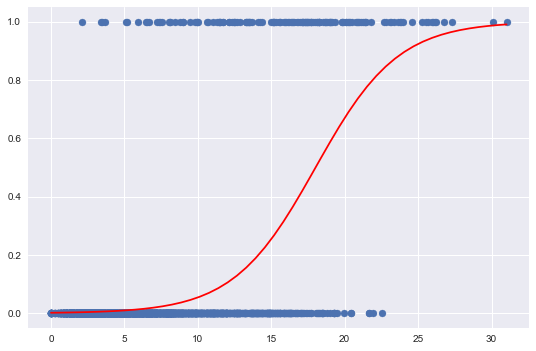

In [49]:
X = df_HOF[["PTS"]]  
y = df_HOF["Hall_of_Fame"]  

model = LogisticRegression()

# Fit the model to the data
model.fit(X, y)
coef = model.coef_[0]
intercept = model.intercept_

x_values = np.linspace(X.min(), X.max(), 50)

# Predict y for each x value
y_predicted = 1 / (1 + np.exp(-(coef * x_values + intercept)))

# Plot the data
plt.scatter(X, y)
plt.plot(x_values, y_predicted, color='red')
plt.show()

<p style="font-family: 'Times New Roman', Times, serif;">
The slope of the sigmoid function indicates that as a player's average points per game increases, their likelihood of being inducted into the Hall of Fame also increases. However, there are still some players who scored more than 20 points per game and were not inducted into the Hall of Fame, possibly because they did not have enough accolades or because they have not yet been inducted, even though the threshold was set at 1995. The analysis also shows that some players who were inducted into the Hall of Fame had relatively low scoring performances over the course of their careers, on average. This could be due to their excellence in other aspects of the game, such as rebounding, or because they have many accolades.
<p>

<h3  style="font-family: 'Times New Roman', Times, serif;"> 8. Team data - What determines winning? </h3>

<p style="font-family: 'Times New Roman', Times, serif;">
In this section, we will shift our focus from analyzing individual player statistics to examining team statistics as a whole. We will first investigate whether the total points scored by a team during the regular season is a reliable predictor of their success in basketball games. Additionally, we will delve into more advanced basketball metrics later on in the analysis.
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
Scraping the points data:
</p>

In [50]:
url = "https://www.basketball-reference.com/leagues/NBA_2022.html"
html = pd.read_html(url, header = 0)
team_df_PTS = html[6]
team_df_PTS["PTS"] = team_df_PTS["PTS"] / 82
team_df_PTS = team_df_PTS[["Team", "PTS"]]
team_df_PTS = team_df_PTS.drop(team_df_PTS.tail(1).index) # Dropping totals
team_df_PTS.head()

,Team,PTS
0,Minnesota Timberwolves*,115.939024
1,Memphis Grizzlies*,115.609756
2,Milwaukee Bucks*,115.487805
3,Charlotte Hornets,115.329268
4,Phoenix Suns*,114.829268


<p style="font-family: 'Times New Roman', Times, serif;">
Scraping the advanced statistics:
</p>

In [51]:
url = "https://www.basketball-reference.com/leagues/NBA_2022.html"
html = pd.read_html(url, header = 0)
team_df = html[10] # table 10 within the html
header = team_df.iloc[0]
team_df = team_df[1:]
team_df = team_df.rename(columns=header)
team_df = team_df[["Team", "W", "L", "eFG%", "TOV%", "ORB%", "FT/FGA", "eFG%", "TOV%", "DRB%", "FT/FGA"]]
team_df["W"] = team_df["W"].astype(float)
team_df = team_df.merge(team_df_PTS, on = "Team")
team_df.head()

,Team,W,L,eFG%,eFG%,TOV%,TOV%,ORB%,FT/FGA,FT/FGA,eFG%,eFG%,TOV%,TOV%,DRB%,FT/FGA,FT/FGA,PTS
0,Boston Celtics*,51.0,31,.542,.502,12.4,12.5,24.0,.195,.183,.542,.502,12.4,12.5,77.3,.195,.183,111.756098
1,Phoenix Suns*,64.0,18,.549,.510,11.6,13.0,22.3,.176,.195,.549,.510,11.6,13.0,77.1,.176,.195,114.829268
2,Utah Jazz*,49.0,33,.555,.521,12.7,10.9,25.4,.208,.164,.555,.521,12.7,10.9,78.3,.208,.164,113.609756
3,Memphis Grizzlies*,56.0,26,.522,.523,11.2,13.3,30.0,.180,.195,.522,.523,11.2,13.3,77.8,.180,.195,115.609756
4,Golden State Warriors*,53.0,29,.552,.509,13.5,13.0,22.8,.181,.201,.552,.509,13.5,13.0,78.7,.181,.201,111.000000


<p style="font-family: 'Times New Roman', Times, serif;">
Creating an OLS:
</p>

In [52]:
team_mod_L = smf.ols(formula="W ~ PTS", data=team_df).fit()
team_mod_L.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     15.20
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           0.000552
Time:                        22:31:23   Log-Likelihood:                -109.00
No. Observations:                  30   AIC:                             222.0
Df Residuals:                      28   BIC:                             224.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -179.0515     56.475     -3.170      0.004    -294.734     -63.369
PTS            1.9893      0.510      3.898      0.001       0.944       3.035
==============================================================================
Omnibus:                        0.674   Durbin-Watson:                   1.010
Prob(Omnibus):                  0.714   Jarque-Bera (JB):                0.714
Skew:                          -0.145   Prob(JB):                        0.700
Kurtosis:                       2.302   Cond. No.                     3.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<p style="font-family: 'Times New Roman', Times, serif;">
OLS intepretation:
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
The OLS regression results provide information about the fitted model and how well it represents the relationship between the dependent and independent variables. In this case, the dependent variable is W (wins), and the independent variable is PTS (points).
</p>
<p style="font-family: 'Times New Roman', Times, serif;">
The "R-squared" value, which is 0.352, represents the percentage of the variance in the wins that is explained by points. This value indicates that PTS (points) explains 35.2% of the variation in the wins data.
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
We can get greater implications to what it takes to win basketball games by using four advanced factors for winning. These factors are shooting, turnovers, rebounding, and free throws. By looking at the data for each of these factors, we can gain insight into the key elements of a winning basketball team. In the previous model, we have only looked at the relationship between wins and points scored, but this only provides a limited explanation of what leads to winning games. By considering these four factors, we can gain a more complete understanding of what drives a team's success on the court. I will be scraping data from basketball-reference.com in order to gather the necessary information for my analysis. I am excited to see what insights we can uncover by using these four factors, and how they can help us better understand the factors that lead to winning basketball games.
</p>

In [53]:
team_df.columns = ["Team", "W", "L", "OeFGp", "OppeFGp", "OTOVp", "OppTOVp", "ORBp", "OFTdFGA", "OppFTdFGA", "DROP", "DROP", "DROP", "DROP", "DRBp", "DROP", "DROP", "DROP"]
team_df.drop(columns="DROP", inplace=True)
team_df = team_df.loc[:, ["Team","W","L","OeFGp", "OTOVp", "ORBp","OFTdFGA", "OppeFGp", "OppTOVp", "DRBp","OppFTdFGA"]]
team_df[["W","L","OeFGp", "OTOVp", "ORBp","OFTdFGA", "OppeFGp", "OppTOVp", "DRBp","OppFTdFGA"]] = team_df[["W","L","OeFGp", "OTOVp", "ORBp","OFTdFGA", "OppeFGp", "OppTOVp", "DRBp","OppFTdFGA"]].astype(float)
team_df.head()

,Team,W,L,OeFGp,OTOVp,ORBp,OFTdFGA,OppeFGp,OppTOVp,DRBp,OppFTdFGA
0,Boston Celtics*,51.0,31.0,0.542,12.4,24.0,0.195,0.502,12.5,77.3,0.183
1,Phoenix Suns*,64.0,18.0,0.549,11.6,22.3,0.176,0.510,13.0,77.1,0.195
2,Utah Jazz*,49.0,33.0,0.555,12.7,25.4,0.208,0.521,10.9,78.3,0.164
3,Memphis Grizzlies*,56.0,26.0,0.522,11.2,30.0,0.180,0.523,13.3,77.8,0.195
4,Golden State Warriors*,53.0,29.0,0.552,13.5,22.8,0.181,0.509,13.0,78.7,0.201


In [54]:
team_mod = smf.ols(formula="W ~ OeFGp + OTOVp + ORBp + OFTdFGA + OppeFGp + OppTOVp + DRBp + OppFTdFGA", data=team_df).fit()
team_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     44.97
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           1.70e-11
Time:                        22:31:23   Log-Likelihood:                -72.040
No. Observations:                  30   AIC:                             162.1
Df Residuals:                      21   BIC:                             174.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -155.4256     56.082     -2.771      0.011    -272.055     -38.796
OeFGp        365.3133     40.960      8.919      0.000     280.132     450.494
OTOVp         -4.7834      0.783     -6.106      0.000      -6.413      -3.154
ORBp          -0.0403      0.305     -0.132      0.896      -0.674       0.594
OFTdFGA       72.3137     46.961      1.540      0.139     -25.347     169.975
OppeFGp     -303.4759     47.846     -6.343      0.000    -402.977    -203.975
OppTOVp        5.5068      0.981      5.611      0.000       3.466       7.548
DRBp           1.9815      0.501      3.953      0.001       0.939       3.024
OppFTdFGA    -54.4204     47.571     -1.144      0.266    -153.349      44.509
==============================================================================
Omnibus:                        0.923   Durbin-Watson:                   2.441
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.839
Skew:                          -0.159   Prob(JB):                        0.657
Kurtosis:                       2.245   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<p style="font-family: 'Times New Roman', Times, serif;">
As mentioned above, the independent variables in the OLS regression are various stats related to four advanced factors of the game. The factor are both the opponents average and the actual team average. The variables are:
</p>
<ul style="font-family: 'Times New Roman', Times, serif;">
<li>OeFGp: offensive effective field goal percentage</li>
<li>OTOVp: offensive turnover percentage</li>
<li>ORBp: offensive rebounding percentage</li>
<li>OFTdFGA: offensive free throw attempts per field goal attempt</li>
<li>OppeFGp: opponent's effective field goal percentage</li>
<li>OppTOVp: opponent's turnover percentage</li>
<li>DRBp: defensive rebounding percentage</li>
<li>OppFTdFGA: opponent's free throw attempts per field goal attempt</li>
</ul>

<p style="font-family: 'Times New Roman', Times, serif;">
In the model we can make a few intepretations: The p-value for the variable "OFTdFGA" (offensive free throw attempts per field goal attempt) is 0.139, indicating that it is not a significant predictor of the number of wins. Similarly, the p-value for "ORBp" (offensive rebounding percentage) is 0.896, indicating that it is also not a significant predictor.


<p style="font-family: 'Times New Roman', Times, serif;">
On the other hand, the p-values for the variables "OeFGp" (offensive effective field goal percentage) and "OTOVp" (offensive turnover percentage) are both very low, indicating that they are likely to be significant predictors of the number of wins. This suggests that a team's shooting efficiency and ability to avoid turnovers are important factors in determining their success.

<p style="font-family: 'Times New Roman', Times, serif;">
From the OLS we can give a few pieces of advice to teams: 
<ul style="font-family: 'Times New Roman', Times, serif;">
<li>Shoot effectively and take good shots</li>
<li>Do not turn the ball over</li>
<li>Defensive rebounds are important - offensive rebounds are not</li>
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
An interesting topic to explore is the impact of these statistics on the NBA and whether they have caused teams to focus less on offensive rebounds. This could also explain why smaller players are able to get more rebounds (as suggested by our previous scatterplot in regards to positionsless basketball) in the modern NBA, as fewer opponents are crashing the boards. Additionally, the increased popularity of 3-pointers has likely decreased the likelihood of offensive rebounds, as players are standing further from the basket when shooting. Let's examine how offensive rebound percentage has changed over time:
</p>

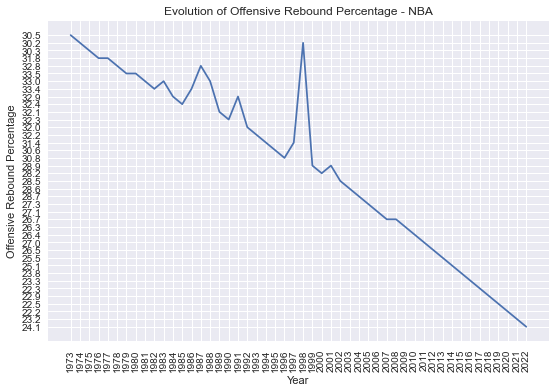

In [55]:
url = "https://www.basketball-reference.com/leagues/NBA_stats_per_game.html"
html = pd.read_html(url, header = 0)
ORB = html[0]
header = ORB.iloc[0]
ORB = ORB[1:]
ORB = ORB.rename(columns=header)

# Removing table headers that are redundant
ORB = ORB.loc[(ORB["Season"] != "Season") & (ORB["PTS"] != "Per Game")]
ORB = ORB[["ORB%", "Season"]]

# Getting the seasons and removing seasons that don't provide information
ORB = ORB[["ORB%", "Season"]]
ORB["Season"] = ORB["Season"].str.split("-")
ORB["Season"] = ORB["Season"].str.get(0)
ORB.dropna(inplace=True)
ORB = ORB.sort_values(by=['Season'], ascending=True)

# Plotting evolution of ORB%
plt.plot(ORB["Season"], ORB["ORB%"])
plt.xticks(rotation=90, size=10)
plt.gca().invert_yaxis()
plt.title("Evolution of Offensive Rebound Percentage - NBA")
plt.ylabel("Offensive Rebound Percentage")
plt.xlabel("Year")

plt.show()

<p style="font-family: 'Times New Roman', Times, serif;">
This graph illustrates the declining emphasis on offensive rebounds over time. This may be because coaches have come to recognize that they do not significantly impact the outcome of a game. This understanding is likely based on their knowledge of relevant statistics. Despite the common advice to "crash the boards" for second chance opportunities, it seems that these opportunities are not as valuable as maintaining a strong defensive position. The strategic tradeoff of not getting back on defense likely contributes to the decreased value of offensive rebounds in determining the winner of a game. Additionaly, as mentioned, statistics has also had influence on 3-pointers attempted - This is also a contributing factor for this graph.
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
As a basketball player with experience at a lower level, I have personally observed that coaches may not be aware of the strategic tradeoff regarding offensive rebounds. This information is valuable for both players and coaches at lower levels of the game, as it seems that NBA coaches are already aware of this tradeoff, as the graph suggests.
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
Let's continue to look at the four factor model:
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
To evaluate the explanatory power of a model with a high R-squared value, we can create a function and use a loop to test the model on multiple years of data. By testing the model on different years of data, we can gain a better understanding of its performance and determine its reliability.
</p>

In [56]:
def teamstats(year, R):
  url = f"https://www.basketball-reference.com/leagues/NBA_{year}.html"
  html = pd.read_html(url, header = 0)
  df_temporary = html[10]
  header = df_temporary.iloc[0]
  df_temporary = df_temporary[1:]
  df_temporary = df_temporary.rename(columns=header)
  df_temporary = df_temporary[["Team", "W", "L", "eFG%", "TOV%", "ORB%", "FT/FGA", "eFG%", "TOV%", "DRB%", "FT/FGA"]]

  df_temporary.columns = ["Team", "W", "L", "OeFGp", "OppeFGp", 
                          "OTOVp", "OppTOVp", "ORBp", "OFTdFGA",
                          "OppFTdFGA", "DROP", "DROP", "DROP", 
                          "DROP", "DRBp", "DROP", "DROP"]
                          
  df_temporary.drop(columns="DROP", inplace=True)
  df_temporary = df_temporary.loc[:, ["Team","W","L","OeFGp", "OTOVp", "ORBp","OFTdFGA", "OppeFGp", "OppTOVp", "DRBp","OppFTdFGA"]]

  df_temporary.drop(df_temporary.tail(1).index,inplace=True)
  df_now = df_temporary.drop(columns=["Team"])
  df_now = df_now.astype(float)
  df_temporary["Team"] = df_temporary["Team"].astype(str)
  df_now = pd.concat([df_temporary["Team"], df_now], axis=1)
  
  if R == True:
    mod = smf.ols(formula="W ~ OeFGp + OTOVp + ORBp + OFTdFGA + OppeFGp + OppTOVp + DRBp + OppFTdFGA", data=df_now).fit()
    mod.summary() 
    print(f"R-squared for the {year-1}-{year} season was {mod.rsquared}")
  else:
    return(df_now)

In [57]:
for year in range (2016,2023):
  teamstats(year, True)
  time.sleep(5)

R-squared for the 2015-2016 season was 0.9581763685303125
R-squared for the 2016-2017 season was 0.9245657475492148
R-squared for the 2017-2018 season was 0.9176827695489115
R-squared for the 2018-2019 season was 0.9567475080012671
R-squared for the 2019-2020 season was 0.9434632753898498
R-squared for the 2020-2021 season was 0.9212479487286569
R-squared for the 2021-2022 season was 0.9448437708911673


<p style="font-family: 'Times New Roman', Times, serif;">
The data suggests that the explanatory power has been consistently high over the years with available data.
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
We can analyze the data from the current season and compare it to the coefficients from the four factor model from last year to evaluate how teams are performing. Although comparing last year's coefficients is not perfect, the game of basketball does not change significantly from year to year, so it is still a good approximation we have for evaluating current performance. This will allow us to determine how teams should be performing based on the four factor model and compare it too the current winning percentage of NBA teams.
</p>

In [58]:
#Getting the 2022-2023 season data
df_2023 = teamstats(2023, False)
df_2023.head()

,Team,W,L,OeFGp,OTOVp,ORBp,OFTdFGA,OppeFGp,OppTOVp,DRBp,OppFTdFGA
1,Cleveland Cavaliers,21.0,11.0,0.548,13.5,23.6,0.218,0.519,13.6,78.4,0.201
2,Boston Celtics,22.0,9.0,0.572,12.5,19.7,0.211,0.527,11.8,77.2,0.192
3,Phoenix Suns,19.0,12.0,0.543,11.6,27.6,0.181,0.534,14.3,74.4,0.233
4,New Orleans Pelicans,18.0,12.0,0.548,13.0,26.4,0.217,0.536,14.0,76.3,0.192
5,Memphis Grizzlies,19.0,10.0,0.533,12.3,29.0,0.189,0.521,12.6,76.8,0.201


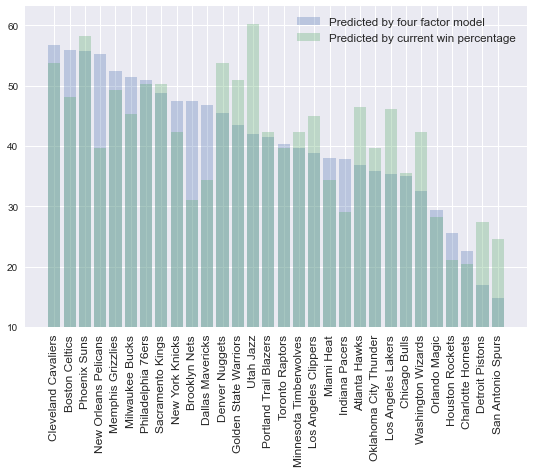

In [59]:
plist = []
for i in range (len(team_mod.params)):
  plist.append(team_mod.params[i])

df_2023["Predicted_Wins_4f"] = (plist[0] + df_2023["OeFGp"] * plist[1] + df_2023["OTOVp"] * plist[2] + df_2023["ORBp"] * plist[3]
                               + df_2023["OFTdFGA"] * plist[4] + df_2023["OppeFGp"] * plist[5] + df_2023["OppTOVp"] * plist[6]
                               + df_2023["DRBp"] * plist[7] + df_2023["OppFTdFGA"] * plist[8])
                               
df_2023["Predicted_Wins_%"] = df_2023["W"] / (df_2023["W"] + df_2023["L"]) * 82

labels = df_2023["Team"]
df_2023.sort_values(by="Predicted_Wins_4f", ascending=False, inplace=True)

# Plot the data
fig, ax = plt.subplots()
plt.bar(labels, df_2023["Predicted_Wins_4f"], alpha=0.3, label = "Predicted by four factor model")
plt.bar(labels, df_2023["Predicted_Wins_%"], alpha=0.3, label = "Predicted by current win percentage" )

ax.set_ylim([10,None])
plt.xticks(rotation=90, size=12)
plt.legend(fontsize="small")
plt.show()

<p style="font-family: 'Times New Roman', Times, serif;">
The model provides two predictions for each team: one based on the team's current winning percentage, and one based on the four factor model. Some teams, such as the Utah Jazz and the Brooklyn Nets, have records that deviate significantly from their expected performance based on the model. It is important to note that the four factor model does not take current winning percentage into account, so the actual win-loss ratio for each team is likely to fall within the range of the two lines on the graph at the end of the season, if the model has accurate predictions. For example, the Brooklyn Nets have performed worse than expected based on the four factor model, which suggests that they may improve their record as the season goes on. On the other hand, the Utah Jazz have outperformed their expected performance based on the four factor model; our model suggests that their success may not continue. It will be interesting to see if the model's predictions hold true as the season progresses and how these teams end up performing.
</p>

<h3 style="font-family: 'Times New Roman', Times, serif;"> 9. Summarizing results </h3>

<p style="font-family: 'Times New Roman', Times, serif;">
The link between statistics and the NBA has been a topic of interest to me for some time. Advanced statistics have undoubtedly influenced the way the game is played today, and as a basketball enthusiast, it was interesting to observe these changes firsthand. This paper aimed to provide a statistical analysis of the evolution of the NBA over the past few decades in order to gain a better understanding of these changes and their impact on the game.
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
In this analysis, we examined player trades, positional changes, shooting trends, Hall of Fame induction, and team success using applied statistics. The data for the analysis was scraped from the website basketball-reference.com and included different variables that would give us a better understanding of the game. The analysis also explored the concept of "positionless basketball," which has become prevalent in the modern NBA era, and tested the idea that the three-pointer has been more heavily emphazised in modern NBA offenses. One interesting finding was that even though true shooting is weighted to account for the value of three-pointers, it still tends to favor big men.Furthermore the analysis evaluated the common saying "it's all about buckets" to determine the most important factors for a team to win basketball games.
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
One of the most interesting and surprising findings from the analysis for me was that offensive rebounds seem to have a strategic trade-off. This finding challenges some common beliefs about the importance of offensive rebounds and adds depth to our understanding of the strategic decisions that teams must make in order to succeed in basketball.
</p>

<p style="font-family: 'Times New Roman', Times, serif;">
Overall, the aim of this analysis was to provide insights for fans, players, and lower-level coaches about the factors that shape the modern game of basketball. To achieve this goal, a statistical analysis of relevant data was conducted, giving us a better understanding of the changes that have occurred in the NBA over the past few decades and the impact of these changes on the game. The results of this analysis can be used to inform decision making and strategy for those involved in the game, as well as provide a deeper understanding of the game for fans and enthusiasts.
</p>

<h3 style="font-family: 'Times New Roman', Times, serif;"> 10. Data sources </h3>

<p style="font-family: 'Times New Roman', Times, serif;">
Player data: https://www.basketball-reference.com/leagues/NBA_{year}_per_game.html
</p>
<p style="font-family: 'Times New Roman', Times, serif;">
For real true shooting: https://www.basketball-reference.com/leagues/NBA_2022_advanced.html
</p>
<p style="font-family: 'Times New Roman', Times, serif;">
Team data: https://www.basketball-reference.com/leagues/NBA_{year}.html
</p>